# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


Linear regression is when you model the relationship between the indepent variable (x) and dependent variable (y) of a data set. The most basic model for linear regression is $y = \beta_0 + \beta_1 x + \epsilon$ where $\epsilon$ is gaussian noise. Polynomial regression is a more complicated form of linear regression where $y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \epsilon$. By treating $x, x^2, x^3...$ as separate independent variables this can be treated as a linear equation.

Underfitting can occur when using a lower dimensional polynomial fit than is required. If the x and y data has some sort of polynomial relationship but is modeled with a 1st degree linear equation, it is impossible for that linear fit to properly model the data. However, if a polynomial fit with too high of a degree is used it can lead to overfitting. Overfitting in general is when the model starts to "memorize" the training set. It will score a very high accuracy on the training set, but when given a test set that wasn't part of its training it will behave poorly.

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

Logistic regression works to categorize data. For each potential category which the data point can fall into, a probability between 0 and 1 is given. 

A linear SVM seeks to find a line (or hyperplane) which separates two types of data categories and attempts to maximize the margin between the hyperplane and the nearest datapoints. Datapoints which fall along the margin are called support vectors. 
The hyperplane is defined as $w^T \cdot x + w_0 = 0$ for $x \in \mathbb{R}^n$ and the margin is defined as $y_i(w^T \cdot x_i + w_0) \ge 1$ for the datapoints ($x_i, y_i$). If the categories are mostly linearally separable except for some overlap, the margin can be defined as $y_i(w^T \cdot x_i + w_0) \ge 1 - \epsilon_i$ where $\epsilon_i$ is a slack variable which quantifies how much the $i$th datapoint goes past the margin. In this case, the sum of all $\epsilon_i$ is minimized when finding the equation of the hyperplane. If the dataset is not linearally separable a kernel can be used to map the data into a different dimensional space where it can be separated.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x_r = (np.random.rand(10) * 2) - 1
y_r = (np.random.rand(10) * 2) - 1

x_b = (np.random.rand(10) * 2) - 1
x_b = np.array([x + 2 if x > 0 else x - 2 for x in x_b])
y_b = (np.random.rand(10) * 2) - 1
y_b = np.array([y + 2 if y > 0 else y - 2 for y in y_b])

# Not linearally separable!
plt.plot(x_r, y_r, color='r', linestyle='', marker='o')
plt.plot(x_b, y_b, color='b', linestyle='', marker='o')
plt.title("Not linearally separable")
plt.show()

# Transform to make it separable
def kernel(x, y):
    return x, y**2

plt.plot(*kernel(x_r, y_r), color='r', linestyle='', marker='o')
plt.plot(*kernel(x_b, y_b), color='b', linestyle='', marker='o')
plt.title("Linearally separable with kernel!")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

K-NN is a lazy learnng algorithm because the model does not have to be trained prior to being used. Using k-NN is good for distinguishing the class of things which are similar to each other. 

K-NN works by first taking in a training set of data points and normalizing its features so that they have values from 0 to 1. This makes it so that the variation in all the features are weighted equally. Then to predict the label of a new datapoint, the distance between it and all the training set data points is calculated in the feature space. In my implementation I modeled this using euclidean distance. The first k training set data points with the smallest distance are considered as its k nearest neighbours. The most common label amongst these k known points is used as the prediction.

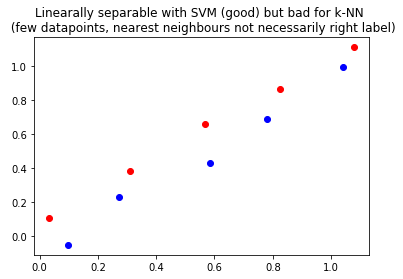

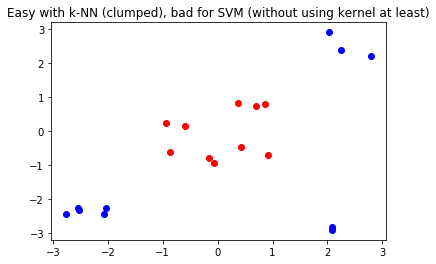

In [2]:
x = np.linspace(0, 1, 5)
x_r = x + np.random.rand(5) * 0.1
x_b = x + np.random.rand(5) * 0.1
y_r = x + np.random.rand(5) * 0.1 + 0.1
y_b = x + np.random.rand(5) * 0.1 - 0.1

plt.plot(x_r, y_r, color='r', marker='o', linestyle='')
plt.plot(x_b, y_b, color='b', marker='o', linestyle='')
plt.title('Linearally separable with SVM (good) but bad for k-NN \n (few datapoints, nearest neighbours not necessarily right label)')
plt.show()

x_r = (np.random.rand(10) * 2) - 1
y_r = (np.random.rand(10) * 2) - 1

x_b = (np.random.rand(10) * 2) - 1
x_b = np.array([x + 2 if x > 0 else x - 2 for x in x_b])
y_b = (np.random.rand(10) * 2) - 1
y_b = np.array([y + 2 if y > 0 else y - 2 for y in y_b])

# Not linearally separable!
plt.plot(x_r, y_r, color='r', linestyle='', marker='o')
plt.plot(x_b, y_b, color='b', linestyle='', marker='o')
plt.title("Easy with k-NN (clumped), bad for SVM (without using kernel at least)")
plt.show()

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [3]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Randomize order of data
iris_df = shuffle(iris_df).reset_index()

# Split dataset into test and validation sets
split = int(len(iris_df.index) * 0.9) # Take 90% of data as training, 10% for validation
train_X = iris_df.drop('target', axis=1).head(split)
train_y = iris_df['target'].head(split)

test_X = iris_df.drop('target', axis=1).tail(len(iris_df.index) - split)
test_y = iris_df['target'].tail(len(iris_df.index) - split)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(135, 5) (135,) (15, 5) (15,)


In [4]:
class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        '''
        Dataframe X, series y
        '''
        # Create dictionary to store normalization data for features in X
        self.min_dict, self.max_dict = {}, {}
        for X_col in X:
            self.min_dict[X_col] = X[X_col].min()
            self.max_dict[X_col] = X[X_col].max()
        
        # Normalize X
        self.__normalize(X)
        
        # Save X and y
        self.X = X
        self.y = y
    
    def predict(self, x):
        '''
        Predict Y for point X
        '''
        
        # Normalize x
        self.__normalize(x)
        
        # Rank euclidean distance of each X_i in X to x
        # Iterate over rows in X
        dist = np.array([])
        for index, row in self.X.iterrows():
            dist = np.append(dist, self.__dist(x.values, row.values))

        # Get most common label in k nearest neighbours
        nearest = [self.y[i] for i in np.argsort(dist)[:self.k]]
        values, counts = np.unique(nearest,return_counts=True)
        ind = np.argmax(counts)
        return values[ind]
        
    def __dist(self, x1, x2):
        # Except x1 and x2 to be an array of their features
        # Saving computational complexity by using the square of the distance, since we just care about minimizing it
        return sum(*[(x1_i - x2_i)**2 for x1_i, x2_i in zip(x1, x2)])
            
    def __normalize(self, X):
        for X_col in X:
            X[X_col] = (X[X_col] - self.min_dict[X_col]) / (self.max_dict[X_col] - self.min_dict[X_col])

# 'Train' K-NN
knn_classifier = KNN(5)
knn_classifier.fit(train_X, train_y)

# Keep track of accuracy
a = 0
# Test each point in the test set
for index, row in test_X.iterrows():
    label = knn_classifier.predict(row.to_frame().transpose())
    if(label == test_y[index]):
        a+= 1
        
# Fraction of test data that was correctly classified.
print(a/float(len(test_X)))

0.8666666666666667


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

Bagging and boosting are when you use a single type of machine learning model multiple times, and take some combination of their outputs as the final result. When bagging, each instance of the model gets a random selection of the data set to train on and all results are equally weighted. In boosting, certain elements of the data set are weighted to appear more often, and the combined result of all their outputs is weighted based on their errors (lower error is weighted more). Boosting is better than bagging when the model has bad performance but can lead to overfitting. Bagging can be better when overfitting is a big issue, as it reduces the overfitting of the model.

A decision tree is used to classify a data point. There is a condition at each node of the tree which relates to the features of the data, and depending on the binary answer to the node's condition you go to one of the node's 2 children. This is continued until a leaf is reached, which will have the label which coresponds to the datapoint.

A random forest is when you take the average of many decision trees, where each tree is trained on a random subset of the total data.

Pros/cons
Decision tree:
Pros:
<ul>
    <li>Good for classifying</li> 
    <li>Easy to interpret</li>
</ul>
Cons:
<ul>
    <li>Prone to overfitting</li>
</ul>

Random forest
Pros:
<ul>
    <li>Good for classifying</li>
    <li>Less overfitting</li>
    <li>Can reduce error</li>
</ul>
Cons:
<ul>
    <li>Difficult to interpret</li>
</ul>


### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

PCAs achieve dimensionality reduction by computing the covariance of its various features. If two features rely heavily on each other they can be combined and replaced by a new feature. In this way, the dimensionality is reduced whithout getting rid of important information. The eigenvectors and eigenvalues come up in PCA when trying to separate correlated features. Given a covariance matrix of the features, transforming it such that its axes correspond to its eigenvectors will remove covariance and make it such that the variance on each feature is equal to the eigenvalues. When finding the covariance matrix the mean must first be subtracted in order to center the data around the origin.

Autoencoders are neural networks where a large input set is bottlenecked into one or more smaller hidden layers (encoded). They're trained by having them output a layer with the same dimensions as the input, and comparing the output to the original image. This trains it to best encode and decode the data. PCAs rely upon linear transformations in order to reduce dimensionality, whereas autoencoders can work non-linearally. They can also work faster than PCAs on larger data sets. An autoencoder can be equivalent to a PCA when there is a single hidden layer and when only linear functions are used.

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [5]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


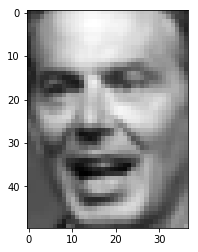

Accuracy with reduced dimensionality:  0.5891472868217055
Accuracy with original dimensionality:  0.5891472868217055


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier

# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')
plt.show()

# Split dataset
split = int(len(X) * 0.9) # Take 90% of data as training, 10% for validation
train_X = X[:split]
train_y = y[:split]
test_X = X[split:]
test_y = y[split:]

# Using 50 components
pca = PCA(n_components=50)
pca.fit(X)

train_X_pca = pca.transform(train_X)
test_X_pca = pca.transform(test_X)

# KNN with reduced dimensionality
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(train_X_pca, train_y)
print("Accuracy with reduced dimensionality: ", accuracy_score(test_y, knn_pca.predict(test_X_pca)))

# KNN with original dimensionality
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)
print("Accuracy with original dimensionality: ", accuracy_score(test_y, knn.predict(test_X)))

# I train a neural network on this data better, which makes for a much better classifier

## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [7]:
class NN:
    def __init__(self, X, y, hidden_size1, hidden_size2, learning_rate):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        
        self.w1 = np.random.rand(X.shape[1], hidden_size1)
        self.b1 = np.random.rand(hidden_size1)
        
        self.w2 = np.random.rand(hidden_size1, hidden_size2)
        self.b2 = np.random.rand(hidden_size2)
        
        self.w3 = np.random.rand(hidden_size2, y.shape[1])
        self.b3 = np.random.rand(y.shape[1])
        
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.e**(-x))
    
    def dsigmoid(self, x):
        return self.sigmoid(x) * (1.0 - self.sigmoid(x))
        
    def feedforward(self):
        # Linear function, then activation function
        # Layer 1
        self.z1 = (np.dot(self.X, self.w1) + self.b1)
        self.a1 = self.sigmoid(self.z1)
        
        # Layer 2
        self.z2 = (np.dot(self.a1, self.w2) + self.b2)
        self.a2 = self.sigmoid(self.z2)
        
        # Layer 3
        self.z3 = (np.dot(self.a2, self.w3) + self.b3)
        self.a3 = self.sigmoid(self.z3)
        
    def predict(self, x):
        # Same as feedforward
        z1 = (np.dot(x, self.w1) + self.b1)
        a1 = self.sigmoid(z1)
        
        z2 = (np.dot(a1, self.w2) + self.b2)
        a2 = self.sigmoid(z2)  
        
        z3 = (np.dot(a2, self.w3) + self.b3)
        a3 = self.sigmoid(z3)  
        return a3
        
    def backpropagate(self):             
        # Layer 3
        da3 = 2 * (self.a3 - self.y)
        dz3 = da3 * self.dsigmoid(self.z3)
        
        dw3 = np.dot(np.transpose(self.a2), dz3)
        db3 = sum(dz3)

        # Layer 2
        da2 = np.dot(dz3, np.transpose(self.w3))
        dz2 = da2 * self.dsigmoid(self.z2)
        
        dw2 = np.dot(np.transpose(self.a1), dz2)
        db2 = sum(dz2)
        
        # Layer 1
        da1 = np.dot(dz2, np.transpose(self.w2))
        dz1 = da1 * self.dsigmoid(self.z1)
        
        dw1 = np.dot(np.transpose(self.X), dz1)
        db1 = sum(dz1)
        
        # Update weights

        self.w3 -= dw3 * self.learning_rate
        self.b3 -= db3 * self.learning_rate
        
        self.w2 -= dw2 * self.learning_rate
        self.b2 -= db2 * self.learning_rate
        
        self.w1 -= dw1 * self.learning_rate
        self.b1 -= db1 * self.learning_rate   
        
    def loss(self):
        return sum(sum((self.a3 - self.y)**2))
    
    def train(self, iterations, print_loss=False):
        for i in range(0, iterations + 1):
            self.feedforward()
            self.backpropagate()
            if print_loss and i % 500 == 0:
                print("Epoch:\t", i, " Loss:\t", self.loss())    
                
    def save(self, filename):
        np.save(filename, [self.w1, self.b1, self.w2, self.b2, self.w3, self.b3])
    
    def load(self, filename):
        self.w1, self.b1, self.w2, self.b2, self.w3, self.b3 = np.load(filename)

In [8]:
from sklearn.datasets import load_wine
from sklearn.utils import shuffle
from sklearn import preprocessing
import pandas

# loading dataset
wine = load_wine()
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

# Randomize order of data
wine_df = shuffle(wine_df).reset_index()

# Split dataset into test and validation sets
split = int(len(wine_df.index) * 0.9) # Take 90% of data as training, 10% for validation

# One hot encode y
y = wine_df['target']
maximum = np.max(y)
encoded_y = np.zeros(shape=(len(y), int(maximum) + 1))
for i in range(0, len(y)):
    encoded_y[i][int(y[i])] = 1
train_y = encoded_y[:split]
test_y = encoded_y[split:]

X = wine_df.drop('target', axis=1).values
X = preprocessing.MinMaxScaler().fit_transform(X) # Normalize

train_X = X[:split]
test_X = X[split:]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(160, 14) (160, 3) (18, 14) (18, 3)


In [10]:
nn = NN(train_X, train_y, 9, 6, 0.005)
nn.train(10000, print_loss=True)
nn.save("wine-10000-epochs")

Epoch:	 0  Loss:	 297.57198346896143
Epoch:	 500  Loss:	 105.29145881758926
Epoch:	 1000  Loss:	 105.2874482329344
Epoch:	 1500  Loss:	 105.28343584448362
Epoch:	 2000  Loss:	 105.27890381040282
Epoch:	 2500  Loss:	 105.27316514043348
Epoch:	 3000  Loss:	 105.26497598057776
Epoch:	 3500  Loss:	 105.25141803422827
Epoch:	 4000  Loss:	 105.22282199580458
Epoch:	 4500  Loss:	 105.10603972259013
Epoch:	 5000  Loss:	 66.33227195535012
Epoch:	 5500  Loss:	 40.65116423600559
Epoch:	 6000  Loss:	 2.7897964481371984
Epoch:	 6500  Loss:	 1.1200254548387538
Epoch:	 7000  Loss:	 0.6642872937864881
Epoch:	 7500  Loss:	 0.4641526173713433
Epoch:	 8000  Loss:	 0.3539903128791857
Epoch:	 8500  Loss:	 0.28491570658430143
Epoch:	 9000  Loss:	 0.23780020351476494
Epoch:	 9500  Loss:	 0.2037188876771229
Epoch:	 10000  Loss:	 0.1779761631176114


In [15]:
def accuracy(predicted, expected):
    acc = 0
    n = len(predicted)
    for i in range(0, n):
        if predicted[i] == expected[i]:
            acc += 1
    return acc / float(n)

# Check accuracy on training data
train_pred = [np.argmax(p) for p in nn.predict(train_X)]
train_expected = [np.argmax(p) for p in train_y]
print("Accuracy on training set:\t", accuracy(train_pred, train_expected))

# Check accuracy on test data
test_pred = [np.argmax(p) for p in nn.predict(test_X)]
test_expected = [np.argmax(p) for p in test_y]
print("Accuracy on test set:\t\t", accuracy(test_pred, test_expected))

Accuracy on training set:	 1.0
Accuracy on test set:		 1.0


In [27]:
# Using neural network on PCA dimension reduced face data because why not

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# One hot encode y
maximum = np.max(y)
encoded_y = np.zeros(shape=(len(y), int(maximum) + 1))
for i in range(0, len(y)):
    encoded_y[i][int(y[i])] = 1
y = encoded_y

X = preprocessing.MinMaxScaler().fit_transform(X) # Normalize

# Split dataset
split = int(len(X) * 0.7) # Take 70% of data as training, 30% for validation
train_X = X[:split]
train_y = y[:split]
test_X = X[split:]
test_y = y[split:]

# Using 50 components
pca = PCA(n_components=50)
pca.fit(X)

train_X_pca = pca.transform(train_X)
test_X_pca = pca.transform(test_X)

print(train_X_pca.shape, train_y.shape, test_X_pca.shape, test_y.shape)

(901, 50) (901, 7) (387, 50) (387, 7)


In [28]:
nn2 = NN(train_X_pca, train_y, 35, 14, 0.001)
nn2.train(10000, print_loss=True)
nn2.save("PCA-Faces-10000-epochs")

Epoch:	 0  Loss:	 5372.43503632278
Epoch:	 500  Loss:	 683.55368820368
Epoch:	 1000  Loss:	 670.8841746454426
Epoch:	 1500  Loss:	 516.169420713695
Epoch:	 2000  Loss:	 446.0288747029418
Epoch:	 2500  Loss:	 388.5005662445497
Epoch:	 3000  Loss:	 337.6599575049302
Epoch:	 3500  Loss:	 308.8134462408023
Epoch:	 4000  Loss:	 269.4416220221973
Epoch:	 4500  Loss:	 217.17378416944342
Epoch:	 5000  Loss:	 159.31338521650667
Epoch:	 5500  Loss:	 109.95509160095716
Epoch:	 6000  Loss:	 77.98474426773348
Epoch:	 6500  Loss:	 56.78634309727281
Epoch:	 7000  Loss:	 44.72022234261813
Epoch:	 7500  Loss:	 37.46640288841016
Epoch:	 8000  Loss:	 32.46947226492428
Epoch:	 8500  Loss:	 28.957977442445298
Epoch:	 9000  Loss:	 26.63806993593584
Epoch:	 9500  Loss:	 24.892008873003327
Epoch:	 10000  Loss:	 23.329892941194526


In [29]:
# Check accuracy on training data
train_pred = [np.argmax(p) for p in nn2.predict(train_X_pca)]
train_expected = [np.argmax(p) for p in train_y]
print("Accuracy on training set:\t", accuracy(train_pred, train_expected))

# Check accuracy on test data
test_pred = [np.argmax(p) for p in nn2.predict(test_X_pca)]
test_expected = [np.argmax(p) for p in test_y]
print("Accuracy on test set:\t\t", accuracy(test_pred, test_expected))

Accuracy on training set:	 0.9822419533851277
Accuracy on test set:		 0.6821705426356589
